In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import lzma
import re

pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 1000
#plt.style.use('ggplot')
plt.style.use('seaborn-paper')
mpl.rcParams['axes.linewidth'] = 0.7

In [2]:
def get_path(path):
    return re.search("(/[^/]+){2}$", path)[0][1:]

In [3]:
file = "results.json.xz"

data = None
if file.endswith('.xz'): file = lzma.open(file, 'rt')
data = pd.read_json(file)
data = data.sort_values(['file', 'mode'])

short_paths = data['file'].map( get_path )
data.update( short_paths )

In [4]:
succeeded = data[data.status == 'ok'][['file', 'mode', 'time_viper', 'inductions', 'induction_depth', 'candidates', 'added_axioms']]

In [5]:
len(succeeded)

243

In [6]:
states = set(data.status.values)
status_colors = {}
for s in states:
    if s == 'ok':
        c = 'green'
    elif s == 'cutintro_uncompressible':
        c = 'yellow'
    elif s == 'cutintro_termset_trivial':
        c = 'gold'
    elif 'timeout' in s:
        c = plt.cm.Blues(hash(s)/2**65+0.5)
    elif s.endswith('exception'):
        c = plt.cm.Reds(hash(s)/2**65+0.5)
    else:
        c = plt.cm.Greys(hash(s)/2**65+0.5)
    status_colors[s] = c

def plot_status(d, legend=True, **kwargs):
    plt.axis('equal')
    d.plot(kind='pie', autopct='%1.1f%%',
                        colors=[status_colors[s] for s in d.index], **kwargs) \
        .set_ylabel('')
    if legend: plt.legend(d.index, loc='center left', bbox_to_anchor=(1, 0.5))

In [7]:
data.groupby('status').size()

status
ok                          243
parsing_other_exception     452
saturated                   201
viper_timeout              1276
dtype: int64

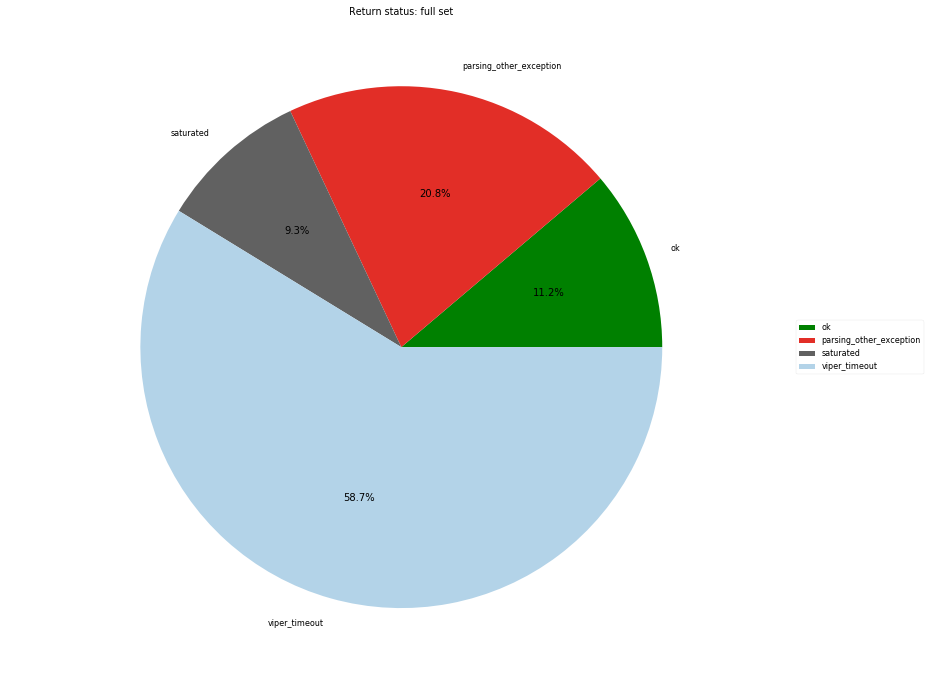

In [8]:
plot_status(data.groupby('status').size(), figsize=(14,12), title='Return status: full set')

In [9]:
succeeded.groupby('mode').size()

mode
analytic_independent    55
analytic_sequential     87
spind                   77
treegrammar             24
dtype: int64

In [10]:
independent_success = succeeded[succeeded['mode'] == 'analytic_independent']
independent_files = set(independent_success.T.loc['file'])

In [11]:
sequential_success = succeeded[succeeded['mode'] == 'analytic_sequential']
sequential_files = set(sequential_success.T.loc['file'])

In [12]:
spind_success = succeeded[succeeded['mode'] == 'spind']
spind_files = set(spind_success.T.loc['file'])

In [13]:
independent_files - spind_files

{'isaplanner/prop_14.smt2',
 'isaplanner/prop_35.smt2',
 'isaplanner/prop_36.smt2',
 'isaplanner/prop_37.smt2',
 'isaplanner/prop_43.smt2',
 'tip2015/bin_nat_s.smt2',
 'tip2015/bin_s.smt2',
 'tip2015/int_add_comm.smt2',
 'tip2015/int_mul_comm.smt2',
 'tip2015/int_mul_ident_left.smt2',
 'tip2015/int_mul_ident_right.smt2',
 'tip2015/list_Interleave.smt2',
 'tip2015/list_nat_Interleave.smt2',
 'tip2015/list_nat_perm_refl.smt2',
 'tip2015/list_perm_refl.smt2',
 'tip2015/nat_boring_ge_reflexive.smt2',
 'tip2015/nat_boring_gt_irreflexive.smt2',
 'tip2015/nat_lt_irreflexive.smt2',
 'tip2015/regexp_RecNil.smt2'}

In [14]:
spind_files - independent_files

{'isaplanner/prop_01.smt2',
 'isaplanner/prop_05.smt2',
 'isaplanner/prop_09.smt2',
 'isaplanner/prop_12.smt2',
 'isaplanner/prop_19.smt2',
 'isaplanner/prop_22.smt2',
 'isaplanner/prop_23.smt2',
 'isaplanner/prop_31.smt2',
 'isaplanner/prop_32.smt2',
 'isaplanner/prop_41.smt2',
 'isaplanner/prop_57.smt2',
 'isaplanner/prop_58.smt2',
 'isaplanner/prop_70.smt2',
 'isaplanner/prop_75.smt2',
 'isaplanner/prop_76.smt2',
 'isaplanner/prop_79.smt2',
 'prod/prop_02.smt2',
 'prod/prop_03.smt2',
 'prod/prop_15.smt2',
 'prod/prop_36.smt2',
 'prod/prop_37.smt2',
 'prod/prop_38.smt2',
 'prod/prop_39.smt2',
 'tip2015/nat_acc_plus_same.smt2',
 'tip2015/nat_boring_max_min_abs.smt2',
 'tip2015/nat_boring_min_idem.smt2',
 'tip2015/nat_le_antisym.smt2',
 'tip2015/nat_le_ge_eq.smt2',
 'tip2015/nat_le_ne_lt.smt2',
 'tip2015/nat_lt_asymmetric.smt2',
 'tip2015/nat_lt_ne.smt2',
 'tip2015/nat_max_idem.smt2',
 'tip2015/nat_min_max_abs.smt2',
 'tip2015/weird_nat_add3_assoc2.smt2',
 'tip2015/weird_nat_add3_assoc

In [15]:
spind_files - sequential_files - independent_files

{'isaplanner/prop_41.smt2',
 'isaplanner/prop_57.smt2',
 'isaplanner/prop_58.smt2',
 'isaplanner/prop_75.smt2',
 'prod/prop_15.smt2',
 'prod/prop_36.smt2',
 'prod/prop_39.smt2',
 'tip2015/nat_boring_max_min_abs.smt2',
 'tip2015/nat_boring_min_idem.smt2',
 'tip2015/nat_max_idem.smt2',
 'tip2015/nat_min_max_abs.smt2',
 'tip2015/weird_nat_add3_assoc2.smt2',
 'tip2015/weird_nat_add3_assoc3.smt2',
 'tip2015/weird_nat_add3_comm13.smt2',
 'tip2015/weird_nat_add3_rrot.smt2'}

In [16]:
pivot = succeeded.pivot_table( index=['file'], columns=['mode'] )
pivot

added_axioms candidates  \
mode                                                 spind      spind   
file                                                                    
false/productive_use_of_failure_app_inj1.smt2          0.0       16.0   
isaplanner/prop_01.smt2                                2.0        9.0   
isaplanner/prop_02.smt2                                5.0       12.0   
isaplanner/prop_03.smt2                                9.0      103.0   
isaplanner/prop_04.smt2                                3.0       25.0   
isaplanner/prop_05.smt2                                9.0      111.0   
isaplanner/prop_06.smt2                                0.0        7.0   
isaplanner/prop_07.smt2                                2.0       12.0   
isaplanner/prop_08.smt2                                1.0       18.0   
isaplanner/prop_09.smt2                                2.0       28.0   
isaplanner/prop_10.smt2                                0.0        6.0   
isaplanner/prop_11.smt2                                0.0        1.0   
isaplanner/prop_12.smt2                                3.0       15.0   
isaplanner/prop_13.smt2                                0.0        1.0   
isaplanner/prop_14.smt2                                NaN        NaN   
isaplanner/prop_15.smt2                                6.0       59.0   
isaplanner/prop_16.smt2                                0.0        2.0   
isaplanner/prop_18.smt2                                1.0       10.0   
isaplanner/prop_19.smt2                                2.0       15.0   
isaplanner/prop_21.smt2                                1.0       10.0   
isaplanner/prop_22.smt2                                3.0       13.0   
isaplanner/prop_23.smt2                                2.0       11.0   
isaplanner/prop_26.smt2                                2.0       36.0   
isaplanner/prop_27.smt2                                1.0       43.0   
isaplanner/prop_28.smt2                                4.0       29.0   
isaplanner/prop_29.smt2                                5.0      256.0   
isaplanner/prop_30.smt2                                5.0      289.0   
isaplanner/prop_31.smt2                                3.0       12.0   
isaplanner/prop_32.smt2                                1.0       11.0   
isaplanner/prop_35.smt2                                NaN        NaN   
isaplanner/prop_36.smt2                                NaN        NaN   
isaplanner/prop_37.smt2                                NaN        NaN   
isaplanner/prop_38.smt2                               16.0      147.0   
isaplanner/prop_39.smt2                               11.0       76.0   
isaplanner/prop_40.smt2                                0.0        1.0   
isaplanner/prop_41.smt2                                6.0       29.0   
isaplanner/prop_42.smt2                                0.0        1.0   
isaplanner/prop_43.smt2                                NaN        NaN   
isaplanner/prop_44.smt2                                1.0        9.0   
isaplanner/prop_45.smt2                                0.0        1.0   
isaplanner/prop_46.smt2                                0.0        1.0   
isaplanner/prop_55.smt2                                NaN        NaN   
isaplanner/prop_56.smt2                                NaN        NaN   
isaplanner/prop_57.smt2                               40.0      432.0   
isaplanner/prop_58.smt2                               25.0      178.0   
isaplanner/prop_59.smt2                                NaN        NaN   
isaplanner/prop_62.smt2                                0.0        1.0   
isaplanner/prop_70.smt2                                0.0       35.0   
isaplanner/prop_75.smt2                               51.0      692.0   
isaplanner/prop_76.smt2                               12.0      220.0   
isaplanner/prop_79.smt2                                2.0       38.0   
isaplanner/prop_80.smt2                                NaN        NaN   
prod/prop_02.smt2              

In [17]:
succeeded.pivot_table( index=['file'], columns=['mode'] ).sum()

                 mode                
added_axioms     spind                      428.0
candidates       spind                     5737.0
induction_depth  analytic_independent        43.0
                 analytic_sequential         73.0
                 spind                       64.0
                 treegrammar                 13.0
inductions       analytic_independent        56.0
                 analytic_sequential        144.0
                 spind                      178.0
                 treegrammar                 13.0
time_viper       analytic_independent    270164.0
                 analytic_sequential     391531.0
                 spind                   410143.0
                 treegrammar             147875.0
dtype: float64

In [18]:
renamed = pivot.rename( index = str, columns = { 'analytic_sequential': 'as', 'analytic_independent': 'ai', 'treegrammar': 'tg' })
renamed

added_axioms candidates  \
mode                                                 spind      spind   
file                                                                    
false/productive_use_of_failure_app_inj1.smt2          0.0       16.0   
isaplanner/prop_01.smt2                                2.0        9.0   
isaplanner/prop_02.smt2                                5.0       12.0   
isaplanner/prop_03.smt2                                9.0      103.0   
isaplanner/prop_04.smt2                                3.0       25.0   
isaplanner/prop_05.smt2                                9.0      111.0   
isaplanner/prop_06.smt2                                0.0        7.0   
isaplanner/prop_07.smt2                                2.0       12.0   
isaplanner/prop_08.smt2                                1.0       18.0   
isaplanner/prop_09.smt2                                2.0       28.0   
isaplanner/prop_10.smt2                                0.0        6.0   
isaplanner/prop_11.smt2                                0.0        1.0   
isaplanner/prop_12.smt2                                3.0       15.0   
isaplanner/prop_13.smt2                                0.0        1.0   
isaplanner/prop_14.smt2                                NaN        NaN   
isaplanner/prop_15.smt2                                6.0       59.0   
isaplanner/prop_16.smt2                                0.0        2.0   
isaplanner/prop_18.smt2                                1.0       10.0   
isaplanner/prop_19.smt2                                2.0       15.0   
isaplanner/prop_21.smt2                                1.0       10.0   
isaplanner/prop_22.smt2                                3.0       13.0   
isaplanner/prop_23.smt2                                2.0       11.0   
isaplanner/prop_26.smt2                                2.0       36.0   
isaplanner/prop_27.smt2                                1.0       43.0   
isaplanner/prop_28.smt2                                4.0       29.0   
isaplanner/prop_29.smt2                                5.0      256.0   
isaplanner/prop_30.smt2                                5.0      289.0   
isaplanner/prop_31.smt2                                3.0       12.0   
isaplanner/prop_32.smt2                                1.0       11.0   
isaplanner/prop_35.smt2                                NaN        NaN   
isaplanner/prop_36.smt2                                NaN        NaN   
isaplanner/prop_37.smt2                                NaN        NaN   
isaplanner/prop_38.smt2                               16.0      147.0   
isaplanner/prop_39.smt2                               11.0       76.0   
isaplanner/prop_40.smt2                                0.0        1.0   
isaplanner/prop_41.smt2                                6.0       29.0   
isaplanner/prop_42.smt2                                0.0        1.0   
isaplanner/prop_43.smt2                                NaN        NaN   
isaplanner/prop_44.smt2                                1.0        9.0   
isaplanner/prop_45.smt2                                0.0        1.0   
isaplanner/prop_46.smt2                                0.0        1.0   
isaplanner/prop_55.smt2                                NaN        NaN   
isaplanner/prop_56.smt2                                NaN        NaN   
isaplanner/prop_57.smt2                               40.0      432.0   
isaplanner/prop_58.smt2                               25.0      178.0   
isaplanner/prop_59.smt2                                NaN        NaN   
isaplanner/prop_62.smt2                                0.0        1.0   
isaplanner/prop_70.smt2                                0.0       35.0   
isaplanner/prop_75.smt2                               51.0      692.0   
isaplanner/prop_76.smt2                               12.0      220.0   
isaplanner/prop_79.smt2                                2.0       38.0   
isaplanner/prop_80.smt2                                NaN        NaN   
prod/prop_02.smt2              

In [19]:
print( renamed.to_html() )

<table border="1" class="dataframe">
  <thead>
    <tr>
      <th></th>
      <th>added_axioms</th>
      <th>candidates</th>
      <th colspan="4" halign="left">induction_depth</th>
      <th colspan="4" halign="left">inductions</th>
      <th colspan="4" halign="left">time_viper</th>
    </tr>
    <tr>
      <th>mode</th>
      <th>spind</th>
      <th>spind</th>
      <th>ai</th>
      <th>as</th>
      <th>spind</th>
      <th>tg</th>
      <th>ai</th>
      <th>as</th>
      <th>spind</th>
      <th>tg</th>
      <th>ai</th>
      <th>as</th>
      <th>spind</th>
      <th>tg</th>
    </tr>
    <tr>
      <th>file</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>false/productive_use_of_failure_app_inj1.smt2</th>
      <td>0.0</td>
      <td>16.0</td>
    